In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.0.0-rc0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

tensorflow.python.util.module_wrapper.TFModuleWrapper

In [30]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [31]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [33]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [8]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [34]:
np.max(X_train)

255

In [35]:
np.mean(X_train)

72.94035223214286

In [36]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

#### Data Exploration

In [37]:
X_train.shape

(60000, 28, 28)

In [38]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

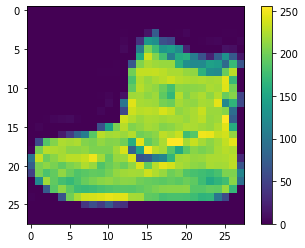

In [39]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

In [40]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [41]:
X_train = X_train/255.0
X_test = X_test/255.0

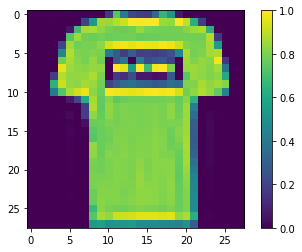

In [17]:
plt.figure()
plt.imshow(X_train[1])
plt.colorbar()

#### Build the model with TF 2.0

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [19]:
model = Sequential()
model.add(Flatten(input_shape = [28, 28]))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### model compilation
* loss
* optimizer
* metrics

In [21]:
model.compile(
    optimizer='adam', 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [45]:
model.fit(X_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0511 - accuracy: 0.9808
Epoch 2/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0510 - accuracy: 0.9812
Epoch 3/10
60000/60000 [==============================] - 2s 32us/sample - loss: 0.0517 - accuracy: 0.9811
Epoch 4/10
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0493 - accuracy: 0.9821
Epoch 5/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.0489 - accuracy: 0.9819
Epoch 6/10
60000/60000 [==============================] - 2s 37us/sample - loss: 0.0484 - accuracy: 0.9821
Epoch 7/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0493 - accuracy: 0.9816
Epoch 8/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0485 - accuracy: 0.9819
Epoch 9/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.0439 - accuracy: 0.9836
Epoch 10/10
60

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

In [47]:
print(test_acc)

0.8864


In [49]:
from sklearn.metrics import accuracy_score

In [50]:
y_pred = model.predict_classes(X_test)

In [54]:
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [51]:
accuracy_score(y_test, y_pred)

0.8864

In [52]:
pred = model.predict(X_test)

In [53]:
pred

array([[1.0512929e-25, 7.5544690e-32, 0.0000000e+00, ..., 7.6409016e-08,
        1.8365637e-27, 9.9999988e-01],
       [5.7055271e-04, 0.0000000e+00, 9.9942929e-01, ..., 0.0000000e+00,
        3.6168497e-31, 1.2461034e-38],
       [5.5287214e-31, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.3224860e-26, 0.0000000e+00, 5.8971217e-36, ..., 4.4905595e-35,
        1.0000000e+00, 0.0000000e+00],
       [9.0631182e-28, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        3.3632581e-29, 6.7846393e-38],
       [9.7580239e-18, 2.2740612e-23, 2.1518281e-18, ..., 4.2162166e-15,
        2.2544508e-11, 5.9132673e-23]], dtype=float32)

In [55]:
pred[0]

array([1.0512929e-25, 7.5544690e-32, 0.0000000e+00, 0.0000000e+00,
       1.4088358e-34, 2.2504429e-14, 4.8536999e-32, 7.6409016e-08,
       1.8365637e-27, 9.9999988e-01], dtype=float32)

In [57]:
np.argmax(pred[0])

9

In [58]:
np.argmax(pred[1])

2